# Tarea 3

En el siguiente Notebook vamos a poner a prueba tu conocimiento sobre el algoritmo de Mapper vistos la clase anterior. Para ello te pedimos que completes las siguientes celdas de código con las funciones necesarias para poder ejecutar el algoritmo de Mapper en las siguientes bases de datos.

In [95]:
import pandas as pd
import kmapper as km
import sklearn
import numpy as np
from IPython.display import display, HTML
import yfinance 
from sklearn.manifold import Isomap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from umap.umap_ import UMAP

## Base de Datos 1.

La siguiente base de datos contiene la información de las calificiones de Matemáticas, Redacción y Lectura de algunos estudiantes de Estados Unidos en el 2015, de igual manera contiene información de nivel de estudios de los padres, raza, sexo, alimentación en la escuela. 

La base de datos se puede encontrar en el siguiente [link](https://www.kaggle.com/spscientist/students-performance-in-exams)



In [3]:
performance_data=pd.read_csv('StudentsPerformance.csv')
performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
performance_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Notemos que en los tres examenes, el promedio fue de 70 puntos, con una desviación estándar de 15 puntos (aproximadamente). Esta información la tomaremos en cuenta en el futuro.


Usualmente las calificaciones tienen una distribución normal, por lo que utilizaremos la cubierta en cuartiles para visualizar la información, por ejemplo si nuestros cuartiles tienen un traslape del 2%, entonces estos serían:

$$(0,26),(24,51),(49,76),(74,100).$$

Antes de decidir que vamos a estudiar, saquemos la información de los scores que tenemos.

In [5]:
data = performance_data[['math score','reading score','writing score']].to_numpy()

Supongamos que queremos conocer la relación que tiene el score de matemáticas con los otros dos (si este influye). Para esto, podemos utilizar mapper proyectando los datos en la variable que mide el score de matemáticas, esto es:

$$(math\,score,reading\,score,writing\,score)\mapsto math\,score.$$

Esta es una función de $\mathbb{R}^3\to\mathbb{R}.$ 

Como me interesa conocer que pasa con los otros dos scores, voy a utilizar su promedio para colorear los elementos del cluster.

In [6]:
mean_outer_score=(data[:,1]+data[:,2])/2.0

In [7]:
mapper = km.KeplerMapper(verbose=1)
# La proyección sobre el math score, corresponde a proyectar sobre la primera columna de data
projected_data = mapper.fit_transform(data, projection=[0] ) # Math score


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [8]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [9]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 4 hypercubes.


c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Created 12 edges and 16 nodes in 0:00:01.147562.


c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [10]:
mapper.visualize(G, 
                title='Performance Data based on Math Score and Mean of other two',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_outer_score,
                color_function_name = 'Mean of Reading and Writing Score',
                node_color_function=np.array(['average','std','sum','max','min']))

#display(HTML('performance_math_score.html'))

Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Performance Data based on Math Score and Mean of other two | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;

In [11]:
cluster_cube1_cluster0 = G['nodes']['cube1_cluster0']

len(G['nodes'])

16

In [12]:
#Inicializacion de datos
nodos =  pd.DataFrame({},columns=["Numero de integrantes","Media Matematicas","Media Reading","Media Writing"])

In [13]:
#filtrar
def crear_datos(nodes):
    
    datos = []
    #Agregar numero de alumnos
    datos.append(len(nodes))
    filtracion_datos = performance_data.filter(items=nodes,axis=0)
    media_math,reading_math,writing_math= filtracion_datos.mean()
    datos.extend([media_math,reading_math,writing_math])
    return datos

In [14]:
values_list = list(G["nodes"].values())
values_list[:4]

[[327], [17, 91, 145, 338, 363, 466, 787, 842], [980], [59]]

In [15]:
for i in range(len(G['nodes'])):
    nodos.loc[len(nodos)] = crear_datos(nodes=values_list[i])

C:\Users\Ruben\AppData\Local\Temp\ipykernel_23228\1374261150.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_math,reading_math,writing_math= filtracion_datos.mean()
C:\Users\Ruben\AppData\Local\Temp\ipykernel_23228\1374261150.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_math,reading_math,writing_math= filtracion_datos.mean()
C:\Users\Ruben\AppData\Local\Temp\ipykernel_23228\1374261150.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_math,reading_math,wri

In [16]:
nodos = nodos.sort_values(by="Numero de integrantes",ascending=False)
nodos

,Numero de integrantes,Media Matematicas,Media Reading,Media Writing
8,242.0,66.123967,70.574380,70.289256
10,181.0,60.348066,61.370166,59.828729
11,151.0,71.609272,81.735099,81.245033
15,135.0,79.688889,78.022222,76.459259
9,115.0,53.565217,50.826087,48.800000
12,113.0,82.513274,87.292035,87.106195
5,82.0,47.439024,54.353659,51.914634
13,69.0,75.608696,67.608696,66.000000
4,53.0,42.849057,43.886792,42.056604
6,50.0,48.820000,64.020000,63.700000


Lo que observamos dentro de aqui es que, se puede observar que en el nodo donde hay mas integrantes, es dode la media se encuentra entre 70

# Base de Datos 2:

Exploración Nivel 2:

Descargar el SP500_tickernames (1).txt

estudiaremos una base de datos de acciones bursátiles. Cabe mencionar que, la elección de los parámetros de Mapper depende del problema que estemos trabajando, y no hay un óptimo como tal, todo depende de lo que queramos estudiar. Con esta base de datos, queremos estudiar aquellas acciones que se parezcan entre ellas, es decir, que tengan un comportamiento similar en el mercado.

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado. Se trabajará un archivo de ticketmaster.

Antes de trabajar con el archivo se debe preparar:

Leer el archivo

* Definir el rango de fechas

* Obtenga los datos históricos

* Obtenga precios de cierre diarios y elimine las columnas que faltan

* Para aplicar el algoritmo de Mapper de manera adecuada, convierta esta base de datos en una matriz de datos, donde cada fila corresponde a una acción y cada columna corresponde a un día. De igual manera estandarice los datos para que todos tengan la misma escala (esto con el objeto de que nuestros no estén tan dispersos).

La razón de retorno de una inversión es la ganancia o pérdida que se obtiene en una inversión en relación con la cantidad invertida inicialmente. El porcentaje de retorno se calcula dividiendo la ganancia o pérdida neta por el costo original de la inversión. Esta tasa de rendimiento permite a los inversores comparar el éxito de una inversión con otras.
Calcula el porcentaje de retorno (de la inversión) de cada ticket sobre el rango de fechas
Proyectar utilizando funciones nuevas: 

Para este caso particular usaremos una proyección dada por el isomap, que es un algoritmo de reducción de dimensionalidad. Intuitivamente, el isomap encuentra una representación de los datos en un espacio de menor dimensión, donde la distancia entre dos puntos es la distancia geodésica (distancia que minimiza la energía) a lo largo de los puntos más cercanos en los datos originales.

Notemos que a nuestra proyección le pedimos n_components=500, lo cual indica que la cubierta en la imágen tendrá 500 abiertas. Dependiente la cantidad de componentes que pidamos, nuestro gráfo cambia de complejidad (más componentes, más nodos y aristas, o menos, o inexistencia).

El UMAP sirve para dar cierta categorización a los datos cuando no son claras las categorías, el UMAP es un algoritmo avanzado que necesita de muchos requerimientos y que no son parte del curso, pero que es importante mencionar para este ejemplo. No nos centraremos mucho en lo que hace UMAP, pero quedense con la idea de la categorización.

Proyecta los datos a dos dimensiones usando dos transformaciones:
 * Coordenada 1 isomap https://en.wikipedia.org/wiki/Isomap Links to an external site. 
 * Coordenada 2 UMAP https://arxiv.org/abs/1802.03426 Links to an external site. 

Una vez obtenida la proyección y el número de abiertos en la cubierta de la imágen. Procede a pedir a mapper que en nuestra proyección, nos haga un clustering de los datos y nos cree el gráfo. Para ello, usa la función mapper.map().

En este caso usamos la proyección descrita anteriormente, y como clusterer usaremos DBSCAN con la métrica del coseno. La métrica del coseno nos indica que tan parecidos son dos vectores o dos pendientes. Como queremos conocer el comportamiento de las acciones (sus ascensos y descensos) esta métrica es ideal.

Una vez que ya apliques el algoritmo a nuestros datos, vamos a visualizarlos. Para ello, usa la función mapper.visualize()

En teoría, si todo salió bien, cada componente conexa del gráfo debería contener información de comportamiento similar en los elementos del nodo.



In [17]:
# Ruta al archivo de texto
file_path = 'SP500_tickernames.txt'

# Crear una lista vacía para almacenar las líneas
lineas = []

# Abrir el archivo en modo de lectura
with open(file_path, 'r') as archivo:
    # Leer cada línea del archivo
    for linea in archivo:
        # Agregar la línea a la lista, usando strip() para eliminar los saltos de línea
        lineas.append(linea.strip())

# Mostrar la lista de líneas
print(lineas[:10])

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']


In [18]:
# Define los tickers y el rango de fechas
tickers = lineas  # Ejemplo con algunos tickers del S&P 500
start_date = '2023-01-01'
end_date = '2024-04-16'

# Crear un DataFrame vacío para almacenar los precios de cierre
closing_prices = pd.DataFrame()

# Descargar datos históricos de cada ticker
for ticker in tickers:
    data = yfinance.download(ticker, start=start_date, end=end_date)
    closing_prices[ticker] = data['Close']

# Mostrar los primeros datos del DataFrame
closing_prices.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2024-04-16)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*******************

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,150.039993,12.74,151.539993,125.070000,162.380005,NaN,NaN,109.580002,270.260010,336.920013,...,70.070000,NaN,106.510002,32.689999,110.760002,126.959999,127.279999,260.200012,48.459999,146.850006
2023-01-04,151.669998,13.59,151.889999,126.360001,163.690002,NaN,NaN,111.209999,269.339996,341.410004,...,70.669998,NaN,106.820000,33.779999,110.589996,128.679993,128.460007,262.989990,50.230000,148.960007
2023-01-05,152.110001,13.99,153.160004,125.019997,163.490005,NaN,NaN,110.800003,262.980011,328.440002,...,69.239998,NaN,109.209999,33.090000,107.449997,127.699997,126.080002,260.059998,49.349998,145.449997
2023-01-06,147.669998,14.18,154.020004,129.619995,166.550003,NaN,NaN,112.330002,269.209991,332.750000,...,71.290001,NaN,110.529999,33.430000,111.269997,130.289993,125.699997,273.420013,51.259998,147.639999
2023-01-09,147.470001,14.61,152.259995,130.149994,161.660004,NaN,NaN,112.150002,273.750000,341.980011,...,71.980003,NaN,108.470001,32.990002,111.790001,129.759995,126.050003,279.290009,51.020000,147.059998


In [19]:
df_closing = closing_prices
df_clean = df_closing.dropna(axis=1, how='any')

### Normalización

Es importante normalizar los datos para realizar el mapeo

In [52]:
closing_prices_transpose = df_clean.transpose()
closing_prices_transpose.head(5)

Date,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2024-04-02,2024-04-03,2024-04-04,2024-04-05,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-15
A,150.039993,151.669998,152.110001,147.669998,147.470001,155.229996,158.169998,156.490005,156.919998,155.399994,...,144.169998,143.729996,141.339996,144.119995,144.460007,147.399994,144.160004,145.000000,140.729996,140.220001
AAL,12.740000,13.590000,13.990000,14.180000,14.610000,15.190000,15.340000,16.830000,17.020000,17.080000,...,14.400000,14.160000,13.830000,13.760000,13.900000,13.950000,13.410000,13.620000,13.150000,12.940000
AAP,151.539993,151.889999,153.160004,154.020004,152.259995,151.970001,153.279999,152.190002,151.029999,149.210007,...,83.919998,84.160004,79.260002,77.339996,78.129997,78.459999,77.949997,74.349998,70.500000,70.080002
AAPL,125.070000,126.360001,125.019997,129.619995,130.149994,130.729996,133.490005,133.410004,134.759995,135.940002,...,168.839996,169.649994,168.820007,169.580002,168.449997,169.669998,167.779999,175.039993,176.550003,172.690002
ABBV,162.380005,163.690002,163.490005,166.550003,161.660004,159.639999,157.169998,152.220001,153.600006,152.830002,...,180.690002,177.330002,167.899994,170.000000,169.800003,170.139999,169.029999,167.520004,162.279999,161.669998


In [75]:
#Estandarizacion
scaler = StandardScaler()
closing_prices_normalized = pd.DataFrame(data=scaler.fit_transform(closing_prices_transpose),columns=closing_prices_transpose.columns,index=closing_prices_transpose.index)
closing_prices_normalized

Date,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2024-04-02,2024-04-03,2024-04-04,2024-04-05,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-15
A,-0.051458,-0.052378,-0.044529,-0.070875,-0.071586,-0.049749,-0.046868,-0.053237,-0.053598,-0.057772,...,-0.146855,-0.147691,-0.149389,-0.145835,-0.146036,-0.140102,-0.143609,-0.141249,-0.144534,-0.142357
AAL,-0.528866,-0.524875,-0.520236,-0.518915,-0.519188,-0.516277,-0.516278,-0.511994,-0.508532,-0.507335,...,-0.423445,-0.422039,-0.424417,-0.422652,-0.424084,-0.422700,-0.427222,-0.423269,-0.419355,-0.419263
AAP,-0.046243,-0.051626,-0.040912,-0.049562,-0.055448,-0.060610,-0.062939,-0.067361,-0.072752,-0.077891,...,-0.275271,-0.273823,-0.283290,-0.287641,-0.287297,-0.286091,-0.287227,-0.292906,-0.295817,-0.294951
AAPL,-0.138282,-0.138987,-0.137831,-0.131457,-0.129936,-0.131368,-0.127979,-0.129050,-0.125659,-0.121021,...,-0.094274,-0.092809,-0.090117,-0.091771,-0.094946,-0.092942,-0.092375,-0.076765,-0.067374,-0.071717
ABBV,-0.008551,-0.011247,-0.005334,-0.007507,-0.023780,-0.035058,-0.050155,-0.067263,-0.064395,-0.066125,...,-0.069017,-0.076548,-0.092101,-0.090879,-0.092071,-0.091947,-0.089664,-0.092908,-0.098113,-0.095691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.131710,-0.131048,-0.128600,-0.129209,-0.131250,-0.135799,-0.140468,-0.143898,-0.140423,-0.139254,...,-0.154230,-0.157685,-0.160303,-0.162865,-0.165714,-0.162083,-0.157080,-0.155567,-0.150846,-0.147905
ZBH,-0.130597,-0.131801,-0.134180,-0.144614,-0.143749,-0.148791,-0.158116,-0.162588,-0.162665,-0.163045,...,-0.180318,-0.176742,-0.179111,-0.181488,-0.183880,-0.178219,-0.179270,-0.178771,-0.179539,-0.177645
ZBRA,0.331581,0.328548,0.327268,0.351187,0.372512,0.388995,0.418566,0.395174,0.391189,0.391336,...,0.177818,0.167839,0.177643,0.164746,0.178545,0.196115,0.194231,0.186193,0.176320,0.168270
ZION,-0.404663,-0.399497,-0.398450,-0.394461,-0.396523,-0.396847,-0.397997,-0.398274,-0.396766,-0.397545,...,-0.363723,-0.361990,-0.364260,-0.362515,-0.362133,-0.360103,-0.367181,-0.363937,-0.360074,-0.359500


In [76]:
def calcular_ROI(row):
    inversion_inicial =  row[0]
    precios = row[0:]
    roi = (precios) / inversion_inicial

    return roi

closing_prices_transpose_roi = closing_prices_normalized.apply(calcular_ROI,axis=1)

In [77]:

closing_prices_transpose_roi.head(10)

Date,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2024-04-02,2024-04-03,2024-04-04,2024-04-05,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12,2024-04-15
A,1.0,1.017884,0.865334,1.377334,1.391144,0.966789,0.910799,1.034559,1.041592,1.122705,...,2.853873,2.870124,2.903106,2.834043,2.837963,2.722632,2.790799,2.744926,2.808771,2.766463
AAL,1.0,0.992455,0.983682,0.981185,0.981700,0.976197,0.976199,0.968099,0.961552,0.959290,...,0.800665,0.798007,0.802504,0.799167,0.801875,0.799257,0.807808,0.800333,0.792933,0.792759
AAP,1.0,1.116411,0.884730,1.071789,1.199078,1.310689,1.361064,1.456696,1.573267,1.684399,...,5.952766,5.921454,6.126176,6.220270,6.212823,6.186760,6.211315,6.334128,6.397083,6.378354
AAPL,1.0,1.005100,0.996739,0.950649,0.939650,0.950005,0.925493,0.933241,0.908720,0.875174,...,0.681753,0.671161,0.651688,0.663651,0.686613,0.672121,0.668020,0.555136,0.487224,0.518627
ABBV,1.0,1.315368,0.623819,0.877966,2.781101,4.100049,5.865635,7.866455,7.531019,7.733428,...,8.071629,8.952355,10.771314,10.628396,10.767802,10.753275,10.486253,10.865648,11.474460,11.191213
ABT,1.0,0.993165,0.972232,0.986190,0.991859,0.976372,1.013969,1.048601,1.013630,1.011292,...,1.120936,1.126249,1.128066,1.122814,1.136227,1.114457,1.119841,1.109945,1.106718,1.095634
ACN,1.0,0.955579,0.920245,0.919511,0.965321,0.952144,0.974124,0.995975,0.964637,0.990449,...,0.717449,0.686212,0.705337,0.696336,0.690019,0.698389,0.674793,0.669866,0.632157,0.638705
ADBE,1.0,0.997576,0.940561,0.919736,0.975547,0.938357,0.936492,0.943392,0.929218,0.929973,...,1.019263,1.003322,0.996763,0.966455,0.965436,0.987390,1.003650,0.981121,0.958576,0.961515
ADI,1.0,0.439440,2.217571,1.319836,0.656392,0.378353,1.044754,1.592291,1.731170,2.451235,...,4.667366,4.619081,4.842440,4.610631,4.189669,2.406287,3.665078,3.142508,4.034035,4.023823
ADM,1.0,1.054772,1.064553,1.063450,1.074044,1.069515,1.077948,1.071819,1.057275,1.057757,...,1.225893,1.221566,1.215737,1.212950,1.220677,1.212220,1.215282,1.217074,1.210009,1.207728


Esto representa los el ROI de cada accion con respecto a la inversion inicial del 2023-01-03

# ISO

In [153]:
#Reduccion de dimensionalidad
isomap =  Isomap(n_neighbors=5,n_components=1)
closing_prices_transformed_iso = isomap.fit_transform(closing_prices_transpose_roi)


# UMAP

In [154]:
reducer = UMAP(n_neighbors=5,n_components=1)
closing_prices_transformed_reducer = reducer.fit_transform(closing_prices_transpose_roi)


## Projected Data

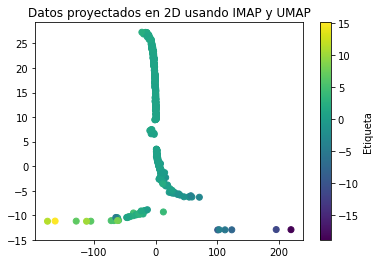

In [167]:
# Creando un gráfico de dispersión de los datos transformados
plt.scatter(closing_prices_transformed_iso , closing_prices_transformed_reducer, c=closing_prices_transpose_roi.iloc[:,-1], cmap=plt.cm.get_cmap('viridis', len(set(closing_prices_transpose_roi.iloc[:,-1]))))
plt.colorbar(label='Etiqueta')
plt.title('Datos proyectados en 2D usando IMAP y UMAP')
plt.show()

De lo que podemos ver de los datos, es que la mayoria de ellos se encuntran en un ROI cercano a 0

In [161]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [164]:
projected_data = np.vstack(projected_data).T
projected_data

array([[-4.59826653e+01, -1.04917030e+01],
       [ 6.39788778e-01,  1.17702017e+01],
       [-1.04744427e+02, -1.12198772e+01],
       [ 1.68178199e+01, -3.94758248e+00],
       [-1.74904427e+02, -1.12268848e+01],
       [-5.65828496e+00,  2.44701271e+01],
       [-1.59910132e+00,  2.01587734e+01],
       [-1.33614854e+01,  2.68079166e+01],
       [ 1.26974394e+01, -9.33681011e+00],
       [-5.61668370e+00,  2.40937061e+01],
       [ 8.83816918e+00, -2.24648571e+00],
       [-8.35490041e+00,  2.57600956e+01],
       [-4.20092047e+00,  2.34628563e+01],
       [-5.98585955e+00,  2.48351231e+01],
       [-8.99581826e-01,  1.78741283e+01],
       [-2.35394321e-01,  1.34641390e+01],
       [-8.43255303e-01,  1.39432545e+01],
       [ 2.57232151e+00,  1.40812111e+00],
       [-1.06405401e+01,  2.66588783e+01],
       [ 1.68723043e+00,  3.34473538e+00],
       [ 2.93211199e+01, -5.51039696e+00],
       [-1.82921737e+01, -9.05844688e+00],
       [-5.33850373e-02,  1.54422989e+01],
       [-1.

In [165]:
G = mapper.map(projected_data, closing_prices_normalized, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (469, 322) using lens shaped (469, 2)

Creating 16 hypercubes.

Created 40 edges and 32 nodes in 0:00:00.182859.


c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ruben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [166]:
mapper.visualize(G, 
                title='Datos de acciones con reducion ISO y UMAP',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_outer_score,
                color_function_name = 'reduccion Iso y UMAP',
                node_color_function=np.array(['average','std','sum','max','min']))

#display(HTML('performance_math_score.html'))

Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Datos de acciones con reducion ISO y UMAP | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  fo

In [169]:
#filtrar
def crear_datos(nodes):
    
    datos = []
    #Agregar numero de alumnos
    datos.append(len(nodes))
    filtracion_datos = closing_prices_transpose_roi.filter(items=nodes,axis=0)
    
    datos.extend([media_math,reading_math,writing_math])
    return datos

In [215]:
values_list = list(G["nodes"].values())
len(values_list)

32

Hay 32 nodos formados, es decir, 32 grupos

In [270]:
def categorize_rows(dataframe, index_lists):
    # Initialize a new 'Category' column with NaN values
    dataframe['Category'] = np.nan
    
    # Assign categories based on the index of the DataFrame
    for category, indices in enumerate(index_lists):
        # Filter indices that are present in the dataframe index
        valid_indices = [idx for idx in indices if idx in list(range(len(dataframe.index)))]
        # Assign category
        for valid_index in valid_indices:
            dataframe.iloc[valid_index,-1] = int(category)

    return dataframe


In [271]:
closing_prices_transpose_roi_nodes =  categorize_rows(closing_prices_transpose_roi,values_list)

In [272]:
closing_prices_transpose_roi_nodes

Date,2023-01-03 00:00:00,2023-01-04 00:00:00,2023-01-05 00:00:00,2023-01-06 00:00:00,2023-01-09 00:00:00,2023-01-10 00:00:00,2023-01-11 00:00:00,2023-01-12 00:00:00,2023-01-13 00:00:00,2023-01-17 00:00:00,...,2024-04-03 00:00:00,2024-04-04 00:00:00,2024-04-05 00:00:00,2024-04-08 00:00:00,2024-04-09 00:00:00,2024-04-10 00:00:00,2024-04-11 00:00:00,2024-04-12 00:00:00,2024-04-15 00:00:00,Category
A,1.0,1.017884,0.865334,1.377334,1.391144,0.966789,0.910799,1.034559,1.041592,1.122705,...,2.870124,2.903106,2.834043,2.837963,2.722632,2.790799,2.744926,2.808771,2.766463,4.0
AAL,1.0,0.992455,0.983682,0.981185,0.981700,0.976197,0.976199,0.968099,0.961552,0.959290,...,0.798007,0.802504,0.799167,0.801875,0.799257,0.807808,0.800333,0.792933,0.792759,12.0
AAP,1.0,1.116411,0.884730,1.071789,1.199078,1.310689,1.361064,1.456696,1.573267,1.684399,...,5.921454,6.126176,6.220270,6.212823,6.186760,6.211315,6.334128,6.397083,6.378354,1.0
AAPL,1.0,1.005100,0.996739,0.950649,0.939650,0.950005,0.925493,0.933241,0.908720,0.875174,...,0.671161,0.651688,0.663651,0.686613,0.672121,0.668020,0.555136,0.487224,0.518627,26.0
ABBV,1.0,1.315368,0.623819,0.877966,2.781101,4.100049,5.865635,7.866455,7.531019,7.733428,...,8.952355,10.771314,10.628396,10.767802,10.753275,10.486253,10.865648,11.474460,11.191213,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,1.0,0.994975,0.976391,0.981009,0.996510,1.031046,1.066491,1.092534,1.066152,1.057278,...,1.197217,1.217088,1.236543,1.258177,1.230604,1.192619,1.181131,1.145288,1.122959,18.0
ZBH,1.0,1.009217,1.027433,1.107330,1.100706,1.139315,1.210714,1.244958,1.245550,1.248458,...,1.353334,1.371475,1.389677,1.407996,1.364647,1.372692,1.368876,1.374749,1.360249,18.0
ZBRA,1.0,0.990854,0.986994,1.059129,1.123445,1.173153,1.262335,1.191788,1.179771,1.180213,...,0.506178,0.535745,0.496851,0.538465,0.591455,0.585772,0.561532,0.531756,0.507478,11.0
ZION,1.0,0.987232,0.984646,0.974789,0.979885,0.980684,0.983527,0.984210,0.980484,0.982409,...,0.894547,0.900157,0.895844,0.894899,0.889882,0.907373,0.899357,0.889812,0.888393,18.0


In [282]:
#Graficar los del nodo 4

nodo4 = closing_prices_transpose_roi_nodes[closing_prices_transpose_roi_nodes["Category"] == 4]
nodo4 = nodo4.iloc[:, :-1]
nodo4 = nodo4.T

In [283]:
nodo4.head(10)

,A,ALL,ARE,AWK,CCI,DGX,EXR,FMC,MAA,MTB,SBNY,TGT,WHR
Date,,,,,,,,,,,,,
2023-01-03 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04 00:00:00,1.017884,0.978455,0.953630,0.898689,0.876459,1.345225,1.077880,1.085636,0.965076,1.009765,0.933987,1.070283,0.873991
2023-01-05 00:00:00,0.865334,0.903334,1.050711,0.956360,0.906872,1.151033,1.156803,1.075374,1.264952,0.937161,1.039016,0.814439,0.716938
2023-01-06 00:00:00,1.377334,0.939154,0.986578,0.946179,0.839653,1.399269,1.164326,1.047668,1.073652,0.903455,0.980544,0.635951,0.790480
2023-01-09 00:00:00,1.391144,0.987104,1.034311,0.927347,0.852373,1.686773,1.009893,0.964760,1.332985,0.983501,0.992517,0.914163,0.751769
2023-01-10 00:00:00,0.966789,0.982720,1.040101,0.838040,0.832930,1.861804,1.104229,0.995157,1.570875,1.068725,1.031972,1.037342,0.701849
2023-01-11 00:00:00,0.910799,1.147159,0.854063,0.969093,0.742517,2.041749,0.856024,0.968660,1.187185,1.097961,1.000821,0.970536,0.813614
2023-01-12 00:00:00,1.034559,1.194381,0.766402,1.167938,0.763719,2.560086,0.854487,1.025105,1.224296,1.096262,1.017607,0.933004,0.830476
2023-01-13 00:00:00,1.041592,1.142752,0.804529,1.265560,0.794676,2.625713,0.978603,1.017525,1.339654,1.122706,0.996091,0.627974,0.846756


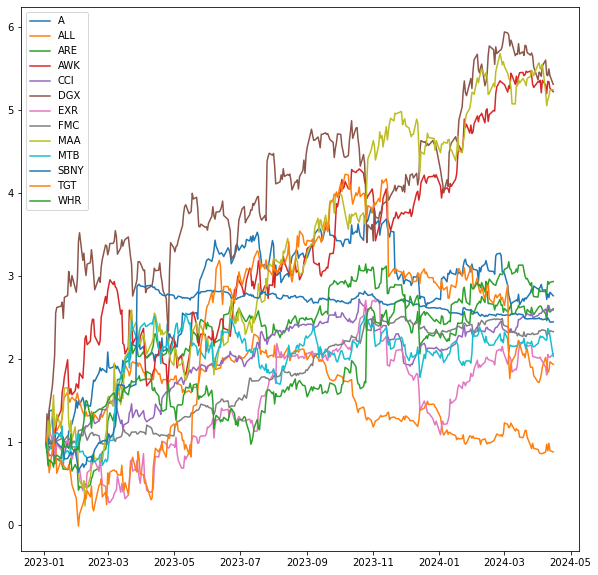

In [284]:
plt.figure(figsize=(10,10))
plt.plot(nodo4)
plt.legend(nodo4.columns)
plt.show()

In [285]:
#Nodo 18

nodo18 = closing_prices_transpose_roi_nodes[closing_prices_transpose_roi_nodes["Category"] == 18]
nodo18 = nodo18.iloc[:, :-1]
nodo18 = nodo18.T

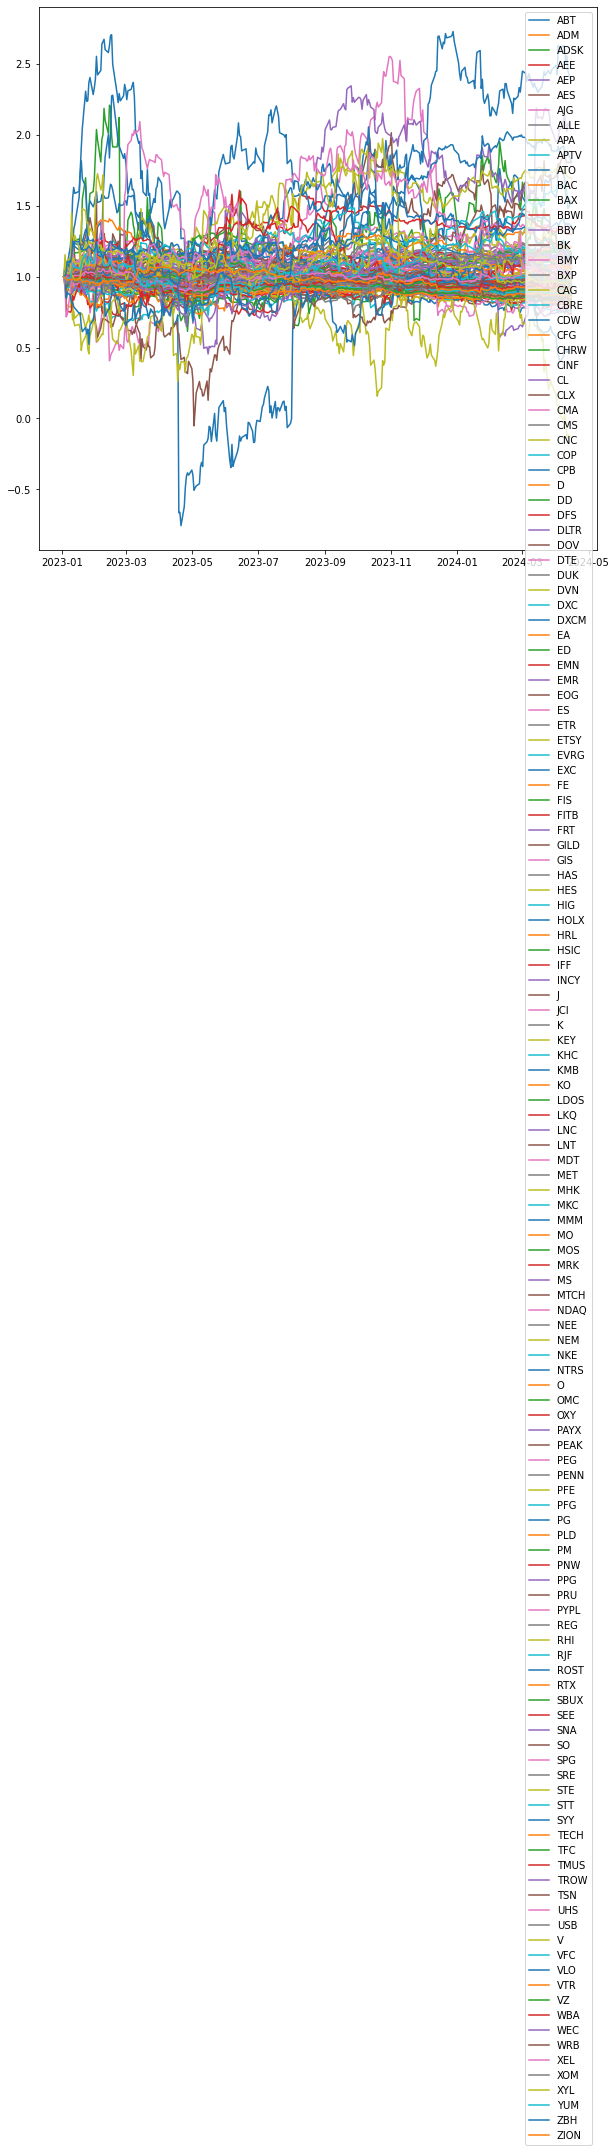

In [287]:
plt.figure(figsize=(10,10))
plt.plot(nodo18)
plt.legend(nodo18.columns)
plt.show()

Lo que deberiamos ver en estos grupos es que el ROI que se obtiene oscila entre la misma cantidad. Por ejemplo, en el nodo 4 fue de 2.0, o de 200% al año. En cambio, para el nodo 18, se encuentran muchas empresas donde la mayoria de ROI igual que en la inversion inicial.